In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
uk=pd.read_csv('ukroad.csv',encoding='latin-1')
uk

In [ ]:
uk_adj=uk[uk['Section']!='New project total']
uk_adj

In [6]:
uk_adj=uk_adj[uk_adj['Section']!='New network total']
uk_adj

,Country,Location,Project,Section,Accuracy1,AMCAccuracy1,Zero,Main1,AMain1,Count1,ACount1,Yforecast,Yestimate,Yconstruct,Ytarget1,Yopen,Mopen,Ycount1
0,UK,A5,Weeford - Fazeley,A5 Improvements,-0.03,-0.03,NaN,21500.0,21823.0,20850.0,21163.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
1,UK,A5,Weeford - Fazeley,A5 Old Route,0.45,0.45,NaN,1450.0,1472.0,2100.0,2132.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
2,UK,A5,Weeford - Fazeley,A38 Northern Arm,0.27,0.27,NaN,32000.0,32480.0,40500.0,41108.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
3,UK,A5,Weeford - Fazeley,A38 Southern Arm,0.03,0.03,NaN,37000.0,37555.0,38000.0,38570.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
4,UK,A5,Weeford - Fazeley,A5 Western Arm,-0.09,-0.09,NaN,22500.0,22838.0,20500.0,20808.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
5,UK,A5,Weeford - Fazeley,Existing stretches total,0.09,0.09,NaN,92950.0,94344.0,101100.0,102617.0,2002.0,NaN,2001.0,2005.0,2005,10,2005.0
8,UK,A6,Alvaston Bypass,Shardlow Road,2.64,2.54,NaN,4200.0,4263.0,15300.0,15074.0,1999.0,NaN,2002.0,2003.0,2003,12,2005.0
9,UK,A6,Alvaston Bypass,Bypass,-0.29,-0.31,NaN,27700.0,28116.0,19750.0,19458.0,1999.0,NaN,2002.0,2003.0,2003,12,2005.0
10,UK,A6,Alvaston Bypass,Existing stretches total,2.64,2.54,NaN,4200.0,4263.0,15300.0,15074.0,1999.0,NaN,2002.0,2003.0,2003,12,2005.0
13,UK,A6,Great Glen Bypass,Old A6,-0.24,-0.25,NaN,NaN,NaN,NaN,NaN,1991.0,NaN,2002.0,NaN,2003,2,NaN


In [8]:
uk_adj=uk_adj[uk_adj['Section']!='Existing stretches total']
uk_adj.to_csv('uk_adj.csv')

In [2]:
flatdata_adjusted=pd.read_csv('flatdata_european_unemployment.csv',encoding='latin-1')
flatdata_adjusted

,BriefDescription,InternalProjectID,ImprovementType,AreaTypeFuncClass,State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,...,Error,AbsError,PercentError,AbsPE,UnemploymentRate_ForecastYear,UnemploymentRate_ForecastYear_Availability,UnemploymentRate_YearProduced,UnemploymentRate_YearProduced_Availability,UnemploymentRate_OpeningYear,UnemploymentRate_OpeningYear-Availability
0,NaN,2320,12,3,WI,No Tolls on 1+ lane,34000,2007,1,2006,...,-2500.0,2500.0,-7.352941,7.352941,4.90,1,4.70,1,4.90,1
1,NaN,2467,12,3,WI,No Tolls on 1+ lane,30000,2011,1,2007,...,-7800.0,7800.0,-26.000000,26.000000,7.80,1,4.90,1,7.80,1
2,NaN,2467,12,3,WI,No Tolls on 1+ lane,19000,2011,1,2007,...,1100.0,1100.0,5.789474,5.789474,7.80,1,4.90,1,7.80,1
3,NaN,2467,12,3,WI,No Tolls on 1+ lane,21900,2011,1,2007,...,-3500.0,3500.0,-15.981735,15.981735,7.80,1,4.90,1,7.80,1
4,NaN,2322,12,3,WI,No Tolls on 1+ lane,22700,2009,1,2006,...,-100.0,100.0,-0.440529,0.440529,8.60,1,4.70,1,8.60,1
5,NaN,2467,12,3,WI,No Tolls on 1+ lane,2800,2011,1,2007,...,-300.0,300.0,-10.714286,10.714286,7.80,1,4.90,1,7.80,1
6,NaN,2467,12,3,WI,No Tolls on 1+ lane,33500,2011,1,2007,...,0.0,0.0,0.000000,0.000000,7.80,1,4.90,1,7.80,1
7,NaN,2467,12,3,WI,No Tolls on 1+ lane,1500,2011,1,2007,...,700.0,700.0,46.666667,46.666667,7.80,1,4.90,1,7.80,1
8,NaN,2467,12,3,WI,No Tolls on 1+ lane,23800,2011,1,2007,...,1600.0,1600.0,6.722689,6.722689,7.80,1,4.90,1,7.80,1
9,NaN,2373,12,1,WI,No Tolls on 1+ lane,8600,2008,1,2006,...,-2000.0,2000.0,-23.255814,23.255814,4.90,1,4.70,1,4.90,1


In [3]:
flatdata_adjusted=pd.read_csv('flatdata_coded.csv',encoding='latin-1')

In [4]:
flatdata_adjusted['DiffYear'].describe()

count    3912.000000
mean        8.225460
std         7.644243
min         0.000000
25%         2.000000
50%         5.000000
75%        15.000000
max        25.000000
Name: DiffYear, dtype: float64

In [5]:
flatdata_adjusted['DiffYear_Availability']= flatdata_adjusted['DiffYear'].apply(lambda x : 1 if x<50 else 0)

In [8]:
flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0].to_csv('flatdata_coded.csv')

C:\Users\jho337\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jho337\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.05,0.95,'Absolute Error Statistics\n$\\mu=20.41$\n$\\mathrm{median}=8.78$\n$\\sigma=32.27$\n$\\mathrm{count}=7$')

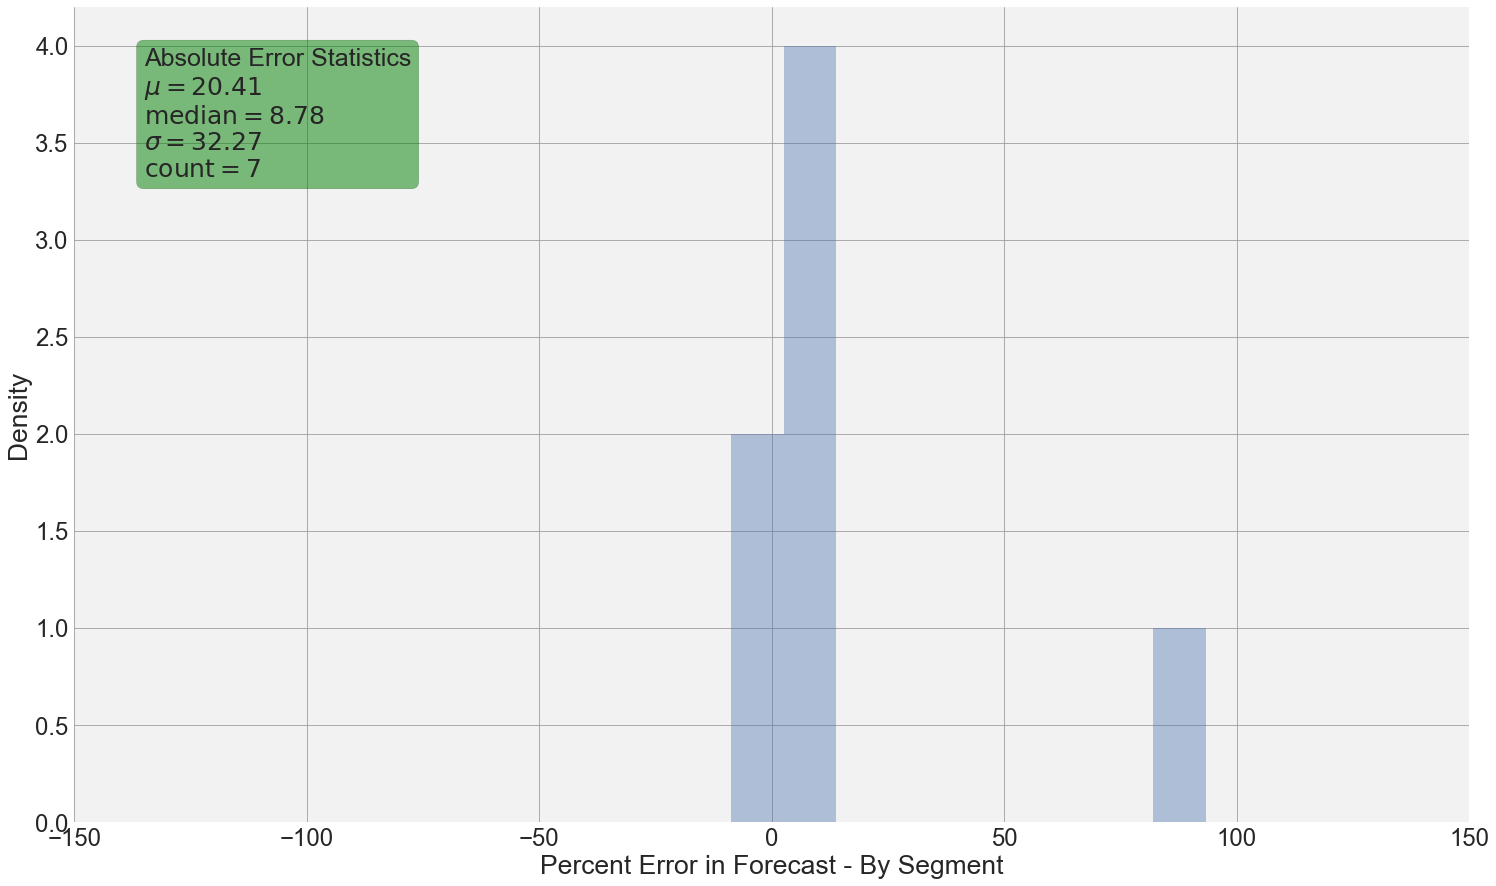

In [92]:
import numpy as np
import matplotlib.pyplot as plt

toll=flatdata_adjusted[flatdata_adjusted['TollType']=='Static Tolls on 1+ lane']
toll['AbsPE']=toll['AbsPE'].astype('float')
toll['PercentError']=toll['PercentError'].astype('float')
#fig, ax = plt.subplots()
x = toll['AbsPE']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = 'Absolute Error Statistics\n$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)


#ax=sns.distplot(project_error2['PercentError'],bins=500,kde=True)
#ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', bbox=props)
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(toll['PercentError'],kde=False,axlabel='Percent Error in Forecast')
ax.figure.set_size_inches(25,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-150,150)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast - By Segment')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
#ax.figure.savefig('PE Distribution by Segment_No Outliers.png',bbox_inches='tight')

In [89]:
toll['PercentError'].describe()

count     7.000000
mean     16.158452
std      34.964940
min      -8.777969
25%      -0.896239
50%       8.597285
75%      10.851267
max      93.379791
Name: PercentError, dtype: float64

In [6]:
flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['ForecastYear']-flatdata_adjusted['YearForecastProduced'])

In [7]:
flatdata_adjusted['ForecastHorizon'] = np.where(flatdata_adjusted['DiffYear']<=5, flatdata_adjusted['DiffYear'], '5+')

In [8]:
def decade_produced(x):
    if x.YearForecastProduced<=1980:
        decade=1
    elif x.YearForecastProduced<=1990:
        decade=2
    elif x.YearForecastProduced<=2000:
        decade=3
    #elif x.YearForecastProduced<=2010:
        #decade=4
    else:
        decade=5
    return decade
def areatype(x):
    if x.AreaTypeFuncClass<3:
        area=1
    elif x.AreaTypeFuncClass<4:
        area=2
    else:
        area=3
    return area
def decade_opening(x):
    if x.ForecastYear<=1990:
        decade2='Before 1990'
    elif x.ForecastYear<=2000:
        decade2='1991-2000'
    elif x.ForecastYear<=2002:
        decade2='2001-2002'   
    elif x.ForecastYear<=2008:
        decade2='2002-2008'
    elif x.ForecastYear<=2012:
        decade2='2008-2012'
    else:
        decade2='After 2012'
    return decade2
def UnifiedImprovement(x): #to adjust the forecast
    if x.ImprovementType<7:
        unifiedtype=1
    elif x.ImprovementType<12:
        unifiedtype=2
    else:
        unifiedtype=3
    return unifiedtype
def decade_count(x):
    if x.Year_ofObservation<=1990:
        decade3='1'
    #elif x.Year_ofObservation<=2000:
        #decade3='2'
    elif x.Year_ofObservation<=2002:
        decade3='3'   
    elif x.Year_ofObservation<=2008:
        decade3='4'
    elif x.Year_ofObservation<=2012:
        decade3='5'
    else:
        decade3='6'
    return decade3


In [9]:
flatdata_adjusted=flatdata_adjusted.assign(Decade_ForecastProduced=flatdata_adjusted.apply(decade_produced,axis=1))

In [10]:
flatdata_adjusted=flatdata_adjusted.assign(Area=flatdata_adjusted.apply(areatype,axis=1))

In [199]:
list(flatdata_adjusted)

['BriefDescription',
 'ProjectYear',
 'InternalProjectID',
 'ImprovementType',
 'AreaTypeFuncClass',
 'main_ProjectInformation.State',
 'TollType',
 'TrafficForecast',
 'ForecastYear',
 'ForecastYearType',
 'YearForecastProduced',
 'ForecastingAgency',
 'ForecastMethodology',
 'SegmentDescription',
 'ProjectID',
 'SegmentID',
 'CountID',
 'Year_ofObservation',
 'Count',
 'Station_Identifier',
 'State',
 'CounterID',
 'FunctionalClass',
 'DiffYear',
 'AdjustedForecast',
 'Error',
 'AbsError',
 'PercentError',
 'AbsPE',
 'FunctionalClassName',
 'MethodologyName',
 'AreaTypeName',
 'UnemploymentRate_ForecastYear',
 'UnemploymentRate_YearProduced',
 'UnemploymentRate_OpeningYear',
 'ForecastHorizon',
 'Decade_ForecastProduced',
 'Decade_Opening',
 'Area']

In [11]:
flatdata_adjusted=flatdata_adjusted.assign(Decade_Opening=flatdata_adjusted.apply(decade_opening,axis=1))

In [13]:
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')
#improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ImprovementType')
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')
#func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Func_Class')
diff_year=flatdata_adjusted['DiffYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Diff_Year')
unemp_forecast=flatdata_adjusted['UnemploymentRate_ForecastYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_ForecastYear')
unemp_produced=flatdata_adjusted['UnemploymentRate_YearProduced'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_YearProduced')
unemp_opening=flatdata_adjusted['UnemploymentRate_OpeningYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_OpeningYear')


area_type=flatdata_adjusted['Area'].groupby(flatdata_adjusted['InternalProjectID']).min().to_frame(name='Area_Type')
#year_produced=flatdata_adjusted['YearForecastProduced'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='YearForecastProduced')
#year_open=flatdata_adjusted['ForecastYear'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ForecastYear')
#year_count=flatdata_adjusted['Year_ofObservation'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Year_ofObservation')
#state=flatdata_adjusted['main_ProjectInformation.State'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='State')

In [14]:
flat_imp=flatdata_adjusted[flatdata_adjusted['ImprovementType'].notnull()]
improvement_type=flat_imp['ImprovementType'].groupby(flat_imp['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ImprovementType')

In [15]:
#prod=flatdata_adjusted[flatdata_adjusted['YearForecastProduced'].notnull()]
#opening=flatdata_adjusted[flatdata_adjusted['ForecastYear'].notnull()]
#count=flatdata_adjusted[flatdata_adjusted['Year_ofObservation'].notnull()]
agent=flatdata_adjusted[flatdata_adjusted['ForecastingAgency'].notnull()]

agency=agent['ForecastingAgency'].groupby(agent['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Agency')
#year_produced=prod['YearForecastProduced'].groupby(prod['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='YearForecastProduced')
#year_open=opening['ForecastYear'].groupby(opening['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ForecastYear')
#year_count=count['Year_ofObservation'].groupby(count['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Year_ofObservation')

In [317]:
pd.options.display.max_columns=50
flatdata_func=flatdata_adjusted[flatdata_adjusted['FunctionalClass'].notnull()]
flatdata_func

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,State,CounterID,FunctionalClass,DiffYear,AdjustedForecast,Error,AbsError,PercentError,AbsPE,FunctionalClassName,MethodologyName,AreaTypeName,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,ForecastHorizon,Decade_ForecastProduced,Area,Decade_Opening
0,NaN,2006.0,2320,12.0,3.0,WI,No Tolls on 1+ lane,34000.0,2007.0,1.0,2006.0,1.0,1.0,NaN,58-6302-2320-,NaN,58-22417-401399,2007.0,31500.0,401399.0,58.0,58-22417-401399,3.0,1.0,34000.0,-2500.0,2500.0,-7.352941176,7.352941176,Principle Arterial,Traffic Count Trend,Urban,4.9,4.7,4.9,1.0,5,2,2002-2008
1,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,30000.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6303-2467-,NaN,58-22419-404512,2011.0,22200.0,404512.0,58.0,58-22419-404512,3.0,4.0,30000.0,-7800.0,7800.0,-26,26,Principle Arterial,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
2,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,19000.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6304-2467-,NaN,58-22421-404513,2011.0,20100.0,404513.0,58.0,58-22421-404513,3.0,4.0,19000.0,1100.0,1100.0,5.789473684,5.789473684,Principle Arterial,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
3,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,21900.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6305-2467-,NaN,58-22423-404524,2011.0,18400.0,404524.0,58.0,58-22423-404524,4.0,4.0,21900.0,-3500.0,3500.0,-15.98173516,15.98173516,Minor Arterial,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
4,NaN,2006.0,2322,12.0,3.0,WI,No Tolls on 1+ lane,22700.0,2009.0,1.0,2006.0,1.0,1.0,NaN,58-6306-2322-,NaN,58-22425-401843,2009.0,22600.0,401843.0,58.0,58-22425-401843,3.0,3.0,22700.0,-100.0,100.0,-0.440528634,0.440528634,Principle Arterial,Traffic Count Trend,Urban,8.6,4.7,8.6,3.0,5,2,2008-2012
5,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,2800.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6307-2467-,NaN,58-22427-404541,2011.0,2500.0,404541.0,58.0,58-22427-404541,5.0,4.0,2800.0,-300.0,300.0,-10.71428571,10.71428571,Major Collector,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
6,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,33500.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6308-2467-,NaN,58-22429-404545,2011.0,33500.0,404545.0,58.0,58-22429-404545,3.0,4.0,33500.0,0.0,0.0,0,0,Principle Arterial,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
7,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,1500.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6309-2467-,NaN,58-22431-404547,2011.0,2200.0,404547.0,58.0,58-22431-404547,7.0,4.0,1500.0,700.0,700.0,46.66666667,46.66666667,Local,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
8,NaN,2007.0,2467,12.0,3.0,WI,No Tolls on 1+ lane,23800.0,2011.0,1.0,2007.0,1.0,1.0,NaN,58-6310-2467-,NaN,58-22433-404548,2011.0,25400.0,404548.0,58.0,58-22433-404548,3.0,4.0,23800.0,1600.0,1600.0,6.722689076,6.722689076,Principle Arterial,Traffic Count Trend,Urban,7.8,4.9,7.8,4.0,5,2,2008-2012
9,NaN,2006.0,2373,12.0,1.0,WI,No Tolls on 1+ lane,8600.0,2008.0,1.0,2006.0,1.0,1.0,NaN,58-6311-2373-,NaN,58-22435-510108,2008.0,6600.0,510108.0,58.0,58-22435-510108,3.0,2.0,8600.0,-2000.0,2000.0,-23.25581395,23.25581395,Principle Arterial,Traffic Count Trend,Rural,4.9,4.7,4.9,2.0,5,1,2002-2008


In [16]:
flatdata_adjusted.groupby(flatdata_adjusted['ForecastingAgency']).PercentError.describe()

,count,mean,std,min,25%,50%,75%,max
ForecastingAgency,,,,,,,,
1,1898.0,5.137818,38.921847,-92.741935,-18.965517,-1.286826,25.482625,147.619048
2,18.0,-6.428277,8.622745,-28.731441,-9.855136,-4.976852,-2.634632,6.958879
5,281.0,-5.132038,23.558731,-64.414414,-18.269231,-7.547170,6.263982,93.379791
6,1715.0,-3.487359,46.985713,-89.214610,-20.370104,-8.031079,3.884914,1246.153846


In [17]:
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).min().to_frame(name='Func_Class')
func_class

,Func_Class
InternalProjectID,
10914,1
12356,1
13364,5
13486,1
13624,6
14821,4
16144,3
16514,1
16592,5


In [18]:
df=pd.read_csv('project_errorX.csv')
df

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6


In [19]:
df2=pd.merge(df,area_type,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3
10,16592,2040.000000,2790.000000,-750.000000,750.000000,-26.881720,26.881720,OH,10.200000,10.300000,10.200000,1.000000,1,6,3
11,1663,3600.000000,5010.000000,-1410.000000,1410.000000,-28.143713,28.143713,WI,8.600000,4.900000,8.600000,3.000000,3,1,2


In [20]:
df2=pd.merge(df2,year_open,left_on='InternalProjectID',right_index=True)
df2

NameError: name 'year_open' is not defined

In [338]:
df2=pd.merge(df2,agency,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0,2006.0,11.0,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0,2010.0,1.0,6
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0,2008.0,12.0,6
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0,2010.0,1.0,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0,2008.0,3.0,6
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0,2010.0,1.0,6
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0,2010.0,3.0,6
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0,2009.0,2.0,6
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0,2010.0,11.0,6
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0,2008.0,1.0,6


In [335]:
df2=pd.merge(df2,year_produced,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0


In [336]:
df2=pd.merge(df2,year_count,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0,2006.0
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0,2010.0
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0,2008.0
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0,2010.0
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0,2008.0
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0,2010.0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0,2010.0
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0,2009.0
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0,2010.0
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0,2008.0


In [337]:
df2=pd.merge(df2,improvement_type,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0,2006.0,11.0
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0,2010.0,1.0
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0,2008.0,12.0
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0,2010.0,1.0
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0,2008.0,3.0
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0,2010.0,1.0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0,2010.0,3.0
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0,2009.0,2.0
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0,2010.0,11.0
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0,2008.0,1.0


In [339]:
df2=pd.merge(df2,func,left_on='InternalProjectID',right_index=True)
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0,2006.0,11.0,6,1.0
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0,2010.0,1.0,6,1.0
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0,2008.0,12.0,6,1.0
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0,2010.0,1.0,6,5.0
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0,2008.0,3.0,6,1.0
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0,2010.0,1.0,6,6.0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0,2010.0,3.0,6,4.0
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0,2009.0,2.0,6,3.0
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0,2010.0,11.0,6,1.0
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0,2008.0,1.0,6,5.0


In [ ]:
df2=pd.merge(df2,improvement_type,left_on='InternalProjectID',right_index=True)
df2

In [292]:
func=flatdata_func['FunctionalClass'].groupby(flatdata_func['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='FunctionalClass')

#state=flatdata_adjusted['main_ProjectInformation.State'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='State')
#state
func

,FunctionalClass
InternalProjectID,
10914,1.0
12343,1.0
12356,1.0
13364,5.0
13486,1.0
13624,6.0
14821,4.0
16144,3.0
16514,1.0


In [233]:
project_error=pd.read_csv('project_error.csv')
project_error

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,Year_ofObservation,Decade_Count,Decade_ForecastProduced,Decade_Opening
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,2006.000000,2002-2008,2,2002-2008
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,2010.000000,2008-2012,3,After 2012
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,2008.000000,2002-2008,2,2008-2012
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,2010.000000,2008-2012,2,2008-2012
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,2008.000000,2002-2008,2,2008-2012
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,2010.000000,2008-2012,2,2002-2008
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,2010.000000,2008-2012,2,2002-2008
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,2009.000000,2008-2012,2,After 2012
8,16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,2010.000000,2008-2012,2,2008-2012
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,1.000000,2009.000000,2009.000000,OH,2008.000000,2002-2008,2,2008-2012


In [235]:
unemp_forecast

,UnemploymentRate_ForecastYear
InternalProjectID,
10914,5.400000
12343,8.900000
12356,6.500000
13364,10.200000
13486,6.500000
13624,10.200000
14821,10.200000
16144,10.300000
16514,10.200000


In [58]:
#project_error2=pd.merge(project_error,year_count,left_index=True,right_index=True)

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,Decade_ForecastProduced,Decade_Opening,State,Year_ofObservation


In [213]:
project_error2=pd.merge(project_error2,func,left_index=True,right_index=True)
project_error2

,InternalProjectID_x,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,Year_ofObservation,Decade_Count,Decade_ForecastProduced,Decade_Opening,Diff_Year,ForecastHorizon,InternalProjectID_y,FunctionalClass
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.0,2004.0,2005.0,OH,2006.000000,4,5,2002-2008,1.0,1,10914,1
1,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.0,2006.0,2009.0,OH,2008.000000,4,5,2008-2012,3.0,3,12343,1
2,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1,12356,1
3,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.0,2005.0,2010.0,OH,2008.000000,4,5,2008-2012,5.0,5,13364,5
4,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.0,2008.0,2008.0,OH,2010.000000,5,5,2002-2008,0.0,0,13486,1
5,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.0,2005.0,2007.0,OH,2010.000000,5,5,2002-2008,2.0,2,13624,6
6,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.0,2007.0,2013.0,OH,2009.000000,5,5,After 2012,6.0,6,14821,4
7,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,11.0,2003.0,2009.0,OH,2010.000000,5,5,2008-2012,6.0,6,16144,3
8,16592,2040.000000,2790.000000,-750.000000,750.000000,-26.881720,26.881720,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1,16514,1
9,1663,3600.000000,5010.000000,-1410.000000,1410.000000,-28.143713,28.143713,12.0,2007.0,2010.0,WI,2010.000000,5,5,2008-2012,3.0,3,16579,5


In [21]:
project_error=pd.merge(averagecount,averageforecast,left_index=True,right_index=True)
project_error

,AverageCount,AverageForecast
InternalProjectID,,
10914,67797.500000,69861.250000
12356,28800.000000,31001.000000
13364,4610.000000,4910.000000
13486,53705.000000,60317.500000
13624,580.000000,635.000000
14821,34445.000000,28621.750000
16144,15556.000000,16568.738000
16514,54630.000000,58143.333333
16592,2040.000000,2790.000000


In [269]:
project_error=pd.merge(project_error,forecast_method,left_index=True,right_index=True)
project_error

,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Year_ofObservation,Diff_Year,UnifiedImprovementType,Forecast_Method
InternalProjectID,,,,,,,,,,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,5.400000,6.300000,5.400000,2006.000000,1.000000,2,6.0
12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,8.900000,8.900000,10.200000,2010.000000,5.000000,1,6.0
12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,6.500000,5.900000,6.500000,2008.000000,3.000000,3,6.0
13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,10.200000,10.300000,10.200000,2010.000000,1.000000,1,6.0
13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,6.500000,5.900000,6.500000,2008.000000,5.000000,1,6.0
13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,10.200000,6.500000,10.200000,2010.000000,0.000000,1,6.0
14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,10.200000,5.900000,10.200000,2010.000000,2.000000,1,6.0
16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,10.300000,5.500000,10.300000,2009.000000,6.000000,1,6.0
16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,10.200000,6.300000,10.200000,2010.000000,6.000000,2,6.0


In [247]:
project_error=project_error.assign(Error=project_error['AverageCount']-project_error['AverageForecast'])

In [248]:
project_error=project_error.assign(AbsError=np.abs(project_error['Error']))

In [249]:
project_error=project_error.assign(PercentError=100*project_error['Error']/project_error['AverageForecast'])

In [250]:
project_error=project_error.assign(AbsPE=np.abs(project_error['PercentError']))

In [251]:
project_error=pd.merge(project_error,improvement_type,left_index=True,right_index=True)

In [252]:
project_error=pd.merge(project_error,year_produced,left_index=True,right_index=True)

In [253]:
project_error=pd.merge(project_error,year_open,left_index=True,right_index=True)

In [254]:
project_error=pd.merge(project_error,state,left_index=True,right_index=True)

In [22]:
project_error2=pd.merge(project_error,unemp_forecast,left_index=True,right_index=True)
project_error2

,AverageCount,AverageForecast,UnemploymentRate_ForecastYear
InternalProjectID,,,
10914,67797.500000,69861.250000,5.400000
12356,28800.000000,31001.000000,6.500000
13364,4610.000000,4910.000000,10.200000
13486,53705.000000,60317.500000,6.500000
13624,580.000000,635.000000,10.200000
14821,34445.000000,28621.750000,10.200000
16144,15556.000000,16568.738000,10.300000
16514,54630.000000,58143.333333,10.200000
16592,2040.000000,2790.000000,10.200000


In [256]:
project_error2=pd.merge(project_error2,unemp_produced,left_index=True,right_index=True)
project_error2

,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced
InternalProjectID,,,,,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,5.400000,6.300000
12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,8.900000,8.900000
12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,6.500000,5.900000
13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,10.200000,10.300000
13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,6.500000,5.900000
13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,10.200000,6.500000
14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,10.200000,5.900000
16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,10.300000,5.500000
16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,10.200000,6.300000


In [257]:
project_error2=pd.merge(project_error2,unemp_opening,left_index=True,right_index=True)
project_error2

,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear
InternalProjectID,,,,,,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,5.400000,6.300000,5.400000
12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,8.900000,8.900000,10.200000
12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,6.500000,5.900000,6.500000
13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,10.200000,10.300000,10.200000
13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,6.500000,5.900000,6.500000
13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,10.200000,6.500000,10.200000
14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,10.200000,5.900000,10.200000
16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,10.300000,5.500000,10.300000
16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,10.200000,6.300000,10.200000


In [214]:
project_error2.to_csv('project_error4.csv')

In [211]:
project_error2=pd.read_csv('project_error3.csv')
project_error2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,Year_ofObservation,Decade_Count,Decade_ForecastProduced,Decade_Opening,Diff_Year,ForecastHorizon
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.0,2004.0,2005.0,OH,2006.000000,4,5,2002-2008,1.0,1
1,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.0,2006.0,2009.0,OH,2008.000000,4,5,2008-2012,3.0,3
2,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1
3,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.0,2005.0,2010.0,OH,2008.000000,4,5,2008-2012,5.0,5
4,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.0,2008.0,2008.0,OH,2010.000000,5,5,2002-2008,0.0,0
5,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.0,2005.0,2007.0,OH,2010.000000,5,5,2002-2008,2.0,2
6,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.0,2007.0,2013.0,OH,2009.000000,5,5,After 2012,6.0,6
7,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,11.0,2003.0,2009.0,OH,2010.000000,5,5,2008-2012,6.0,6
8,16592,2040.000000,2790.000000,-750.000000,750.000000,-26.881720,26.881720,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1
9,1663,3600.000000,5010.000000,-1410.000000,1410.000000,-28.143713,28.143713,12.0,2007.0,2010.0,WI,2010.000000,5,5,2008-2012,3.0,3


In [258]:
project_error=pd.merge(project_error2,year_count,left_index=True,right_index=True)
project_error

,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Year_ofObservation
InternalProjectID,,,,,,,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,5.400000,6.300000,5.400000,2006.000000
12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,8.900000,8.900000,10.200000,2010.000000
12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,6.500000,5.900000,6.500000,2008.000000
13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,10.200000,10.300000,10.200000,2010.000000
13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,6.500000,5.900000,6.500000,2008.000000
13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,10.200000,6.500000,10.200000,2010.000000
14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,10.200000,5.900000,10.200000,2010.000000
16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,10.300000,5.500000,10.300000,2009.000000
16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,10.200000,6.300000,10.200000,2010.000000


In [259]:
project_error=project_error[project_error['AverageForecast'].notnull()]

In [113]:
project_error=project_error.assign(Decade_ForecastProduced=project_error.apply(decade_produced,axis=1))

In [340]:
df2=df2.assign(UnifiedImprovementType=df2.apply(UnifiedImprovement,axis=1))
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.300000,5.400000,1.000000,2,6,3,2005.0,2004.0,2006.0,11.0,6,1.0
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.900000,10.200000,5.000000,1,6,3,2017.0,2012.0,2010.0,1.0,6,1.0
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.900000,6.500000,3.000000,3,6,3,2009.0,2006.0,2008.0,12.0,6,1.0
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.300000,10.200000,1.000000,1,6,3,2010.0,2009.0,2010.0,1.0,6,5.0
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.900000,6.500000,5.000000,1,6,3,2010.0,2005.0,2008.0,3.0,6,1.0
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.500000,10.200000,0.000000,1,6,3,2008.0,2008.0,2010.0,1.0,6,6.0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.900000,10.200000,2.000000,1,6,3,2007.0,2005.0,2010.0,3.0,6,4.0
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6.000000,1,6,3,2013.0,2007.0,2009.0,2.0,6,3.0
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.300000,10.200000,6.000000,2,6,3,2009.0,2003.0,2010.0,11.0,6,1.0
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.500000,6.500000,0.000000,1,6,3,2009.0,2009.0,2008.0,1.0,6,5.0


In [341]:
df2.to_csv('df2.csv')

In [264]:
project_error=project_error.assign(UnifiedImprovementType=project_error.apply(UnifiedImprovement,axis=1))

In [76]:
project_error=project_error.assign(Decade_Opening=project_error.apply(decade_opening,axis=1))

In [271]:
project_error=project_error.assign(Decade_Count=project_error.apply(decade_count,axis=1))

In [260]:
project_error=project_error.assign(Diff_Year=project_error['ForecastYear']-project_error['YearForecastProduced'])

In [133]:
project_error=project_error.assign(DiffYear=math.ceil(project_error['Diff_Year']))

TypeError: cannot convert the series to <class 'float'>

In [261]:
project_error=project_error[project_error['Diff_Year']>=0]

In [262]:
project_error=project_error[project_error['AverageForecast'].notnull()]

In [265]:
project_error

,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Year_ofObservation,Diff_Year,UnifiedImprovementType
InternalProjectID,,,,,,,,,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.000000,2004.000000,2005.000000,OH,5.400000,6.300000,5.400000,2006.000000,1.000000,2
12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,1.000000,2012.000000,2017.000000,OH,8.900000,8.900000,10.200000,2010.000000,5.000000,1
12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.000000,2006.000000,2009.000000,OH,6.500000,5.900000,6.500000,2008.000000,3.000000,3
13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.000000,2009.000000,2010.000000,OH,10.200000,10.300000,10.200000,2010.000000,1.000000,1
13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.000000,2005.000000,2010.000000,OH,6.500000,5.900000,6.500000,2008.000000,5.000000,1
13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.000000,2008.000000,2008.000000,OH,10.200000,6.500000,10.200000,2010.000000,0.000000,1
14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.000000,2005.000000,2007.000000,OH,10.200000,5.900000,10.200000,2010.000000,2.000000,1
16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.000000,2007.000000,2013.000000,OH,10.300000,5.500000,10.300000,2009.000000,6.000000,1
16514,54630.000000,58143.333333,-3513.333333,3513.333333,-6.042539,6.042539,11.000000,2003.000000,2009.000000,OH,10.200000,6.300000,10.200000,2010.000000,6.000000,2


In [267]:
project_error.to_csv('project_error.csv')

In [80]:
project_error=pd.read_csv('project_error.csv',encoding='latin-1')

In [166]:
project_error.groupby('Decade_Count').PercentError.describe(percentiles=[0.22,0.95])
#project_error.groupby('Decade_Count').AbsPE.describe(percentiles=[0.05,0.95])

,count,mean,std,min,22%,50%,95%,max
Decade_Count,,,,,,,,
1,76.0,8.172332,39.099579,-77.566425,-15.825719,5.918411,89.112964,130.769231
3,50.0,26.448079,30.351798,-63.914849,0.074487,31.424290,63.308959,91.867652
4,289.0,-4.513378,23.270872,-64.414414,-19.301203,-7.099771,38.053226,147.368421
5,522.0,-8.637665,24.077907,-85.862069,-21.317331,-11.035653,19.493236,227.602474
6,226.0,-13.008630,19.173423,-86.645461,-24.704724,-12.105177,12.387824,65.643087


In [114]:
project_error.groupby('Decade_ForecastProduced').PercentError.describe(percentiles=[0.05,0.75])
#.to_csv('decade_produced.csv')
#project_error.groupby('Decade_ForecastProduced').AbsPE.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,75%,max
Decade_ForecastProduced,,,,,,,,
1,94.0,11.248976,39.893976,-77.566425,-47.122806,8.980990,33.181898,147.368421
2,46.0,28.436578,33.829905,-36.902655,-19.808842,29.924184,49.788910,118.055556
3,51.0,11.133574,48.072357,-33.936784,-24.790288,-1.867999,10.322850,227.602474
5,1134.0,-8.403055,20.728097,-86.645461,-38.628633,-8.644545,0.072688,178.070742


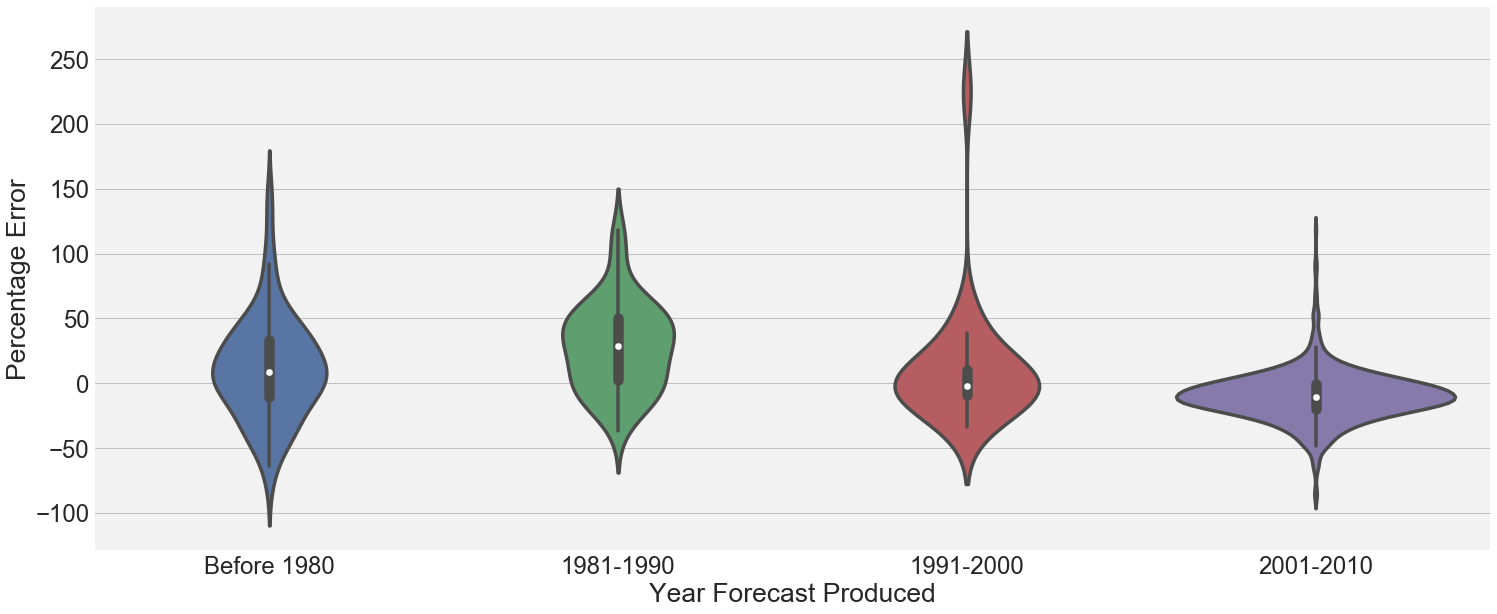

In [151]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['Decade_ForecastProduced'],y=project_error['PercentError'],
                  palette='deep',
#                  x_order=['Before 1990','1991-2000','2001-2002','2002-2008','2008-2012','After 2012'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Year Forecast Produced')
ax.figure.get_axes()[0].set_xticklabels(['Before 1980','1981-1990','1991-2000','2001-2010','After 2010'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of year produced_Project.png',bbox_inches='tight')

In [145]:
project_error['ForecastHorizon'] = np.where(project_error['Diff_Year']<=5, project_error['Diff_Year'], 6)


In [146]:
project_error

,Unnamed: 0,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,ImprovementType,YearForecastProduced,ForecastYear,State,Year_ofObservation,Decade_Count,Decade_ForecastProduced,Decade_Opening,Diff_Year,ForecastHorizon
0,0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,11.0,2004.0,2005.0,OH,2006.000000,4,5,2002-2008,1.0,1.0
1,2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,12.0,2006.0,2009.0,OH,2008.000000,4,5,2008-2012,3.0,3.0
2,3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1.0
3,4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,3.0,2005.0,2010.0,OH,2008.000000,4,5,2008-2012,5.0,5.0
4,5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,1.0,2008.0,2008.0,OH,2010.000000,5,5,2002-2008,0.0,0.0
5,6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,3.0,2005.0,2007.0,OH,2010.000000,5,5,2002-2008,2.0,2.0
6,7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,2.0,2007.0,2013.0,OH,2009.000000,5,5,After 2012,6.0,6.0
7,8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,11.0,2003.0,2009.0,OH,2010.000000,5,5,2008-2012,6.0,6.0
8,10,16592,2040.000000,2790.000000,-750.000000,750.000000,-26.881720,26.881720,1.0,2009.0,2010.0,OH,2010.000000,5,5,2008-2012,1.0,1.0
9,11,1663,3600.000000,5010.000000,-1410.000000,1410.000000,-28.143713,28.143713,12.0,2007.0,2010.0,WI,2010.000000,5,5,2008-2012,3.0,3.0


In [138]:
project_error.groupby('ForecastHorizon').PercentError.describe(percentiles=[0.05,0.95])
#.to_csv('forecast_horizon.csv')
#project_error.groupby('ForecastHorizon').AbsPE.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
ForecastHorizon,,,,,,,,
0.0,42.0,-7.878555,17.920819,-45.454545,-34.112437,-9.544361,12.715895,62.737857
0.599999999999909,1.0,-29.069322,NaN,-29.069322,-29.069322,-29.069322,-29.069322,-29.069322
1.0,189.0,-6.317098,20.422462,-48.888889,-37.093137,-8.620690,30.561195,91.867652
1.1000000000001364,1.0,-11.451473,NaN,-11.451473,-11.451473,-11.451473,-11.451473,-11.451473
1.1818181818184712,1.0,-17.850033,NaN,-17.850033,-17.850033,-17.850033,-17.850033,-17.850033
1.5,2.0,-11.762703,16.634974,-23.525406,-22.349136,-11.762703,-1.176270,0.000000
1.7692307692304894,1.0,-4.775999,NaN,-4.775999,-4.775999,-4.775999,-4.775999,-4.775999
2.0,314.0,-8.094838,21.334207,-86.645461,-40.787295,-8.186113,24.572067,93.379791
3.0,254.0,-7.928336,22.807294,-83.421429,-36.748084,-9.754073,30.402455,107.045688


In [270]:
project_error.to_csv('project_error2.csv')

In [140]:
project_error=pd.read_csv('project_error2.csv',encoding='latin-1')

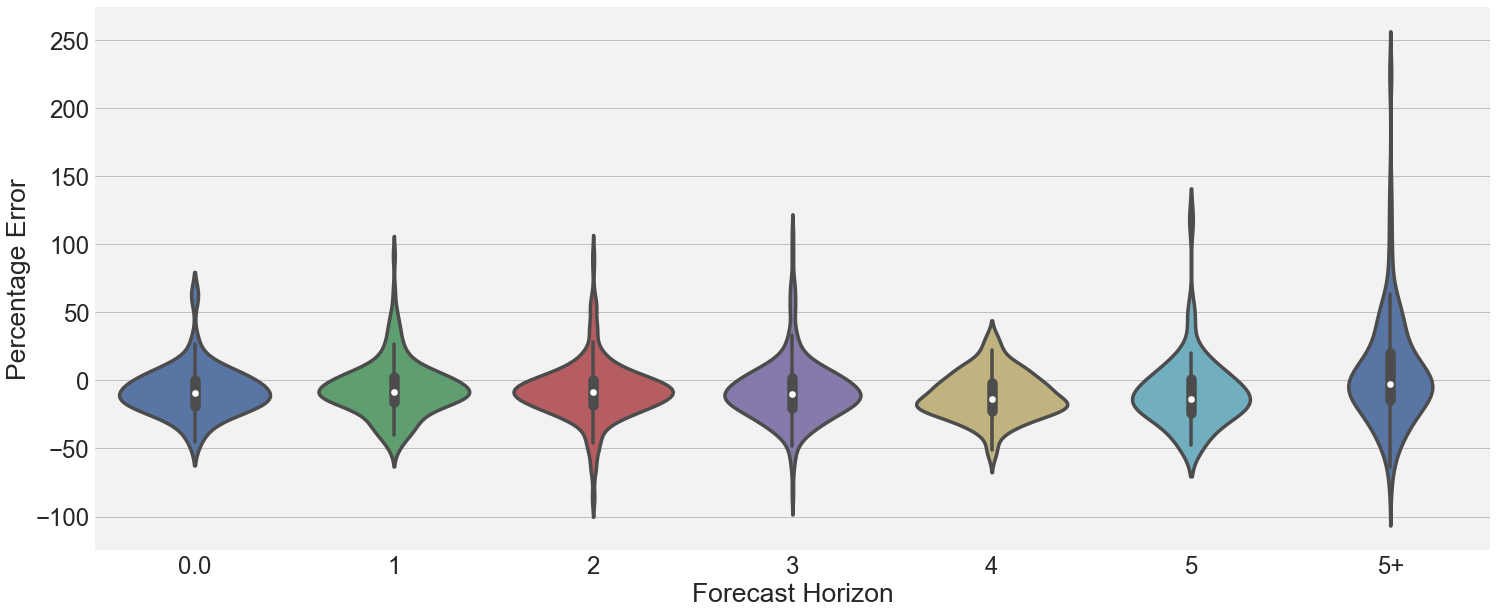

In [150]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['ForecastHorizon'],y=project_error['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Forecast Horizon')
ax.figure.get_axes()[0].set_xticklabels(['0.0','1','2','3','4','5','5+'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of forecast horizon_Project.png',bbox_inches='tight')

In [345]:
project_error.groupby(['Decade_Count']).PercentError.describe(percentiles=[0.05,0.6])

,count,mean,std,min,5%,50%,60%,max
Decade_Count,,,,,,,,
1,76.0,8.172332,39.099579,-77.566425,-46.891978,5.918411,11.826227,130.769231
3,50.0,26.448079,30.351798,-63.914849,-19.367930,31.424290,37.132300,91.867652
4,338.0,-4.217893,21.969112,-64.414414,-34.634510,-5.272434,-0.891404,147.368421
5,602.0,-8.291984,22.862505,-85.862069,-34.815810,-9.432666,-5.687280,227.602474
6,227.0,-13.029957,19.133656,-86.645461,-47.159286,-12.162162,-7.469106,65.643087


In [3]:
df2=pd.read_csv('Project_Flatdata.csv')
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,...,1,2,6,3,2005,2004,2006.0,11,6,1
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,5,1,6,3,2017,2012,2010.0,1,6,1
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,...,3,3,6,3,2009,2006,2008.0,12,6,1
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,1,1,6,3,2010,2009,2010.0,1,6,5
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,5,1,6,3,2010,2005,2008.0,3,6,1
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,0,1,6,3,2008,2008,2010.0,1,6,6
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,2,1,6,3,2007,2005,2010.0,3,6,4
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,6,1,6,3,2013,2007,2009.0,2,6,3
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,...,6,2,6,3,2009,2003,2010.0,11,6,1
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,0,1,6,3,2009,2009,2008.0,1,6,5


In [9]:
def unemp_rate(x):
    if x.UnemploymentRate_OpeningYear<=3:
        Rate=3
    #elif x.UnemploymentRate_OpeningYear<=5:
        #Rate=5
    elif x.UnemploymentRate_OpeningYear<=7:
        Rate=7
    #elif x.UnemploymentRate_OpeningYear<=8:
        #Rate=8
    elif x.UnemploymentRate_OpeningYear<=9:
        Rate=9
    elif x.UnemploymentRate_OpeningYear<=10:
        Rate=10
    else:
        Rate=11
    return Rate

def unemp_change(x):
    if x.Change<=-6:
        change2=1
    elif x.Change<=-4:
        change2=2
    #elif x.Change<=-3:
        #change2=3
    elif x.Change<=-2:
        change2=4
    #elif x.Change<=-1:
        #change2=5
    elif x.Change<=0:
        change2=6
    #elif x.Change<=1:
        #change2=7
    elif x.Change<=2:
        change2=8
    #elif x.Change<=3:
        #change2=9
    elif x.Change<=4:
        change2=10
    #elif x.Change<=5:
        #change2=11
    elif x.Change<=6:
        change2=12
    #elif x.Change<=7:
        #change2=13
    else:
        change2=14
    return change2

In [10]:
df2=df2.assign(Range_Open=df2.apply(unemp_rate,axis=1))
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,...,3,2005,2004,2006.0,11,6,1,7,-0.900000,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,3,2017,2012,2010.0,1,6,1,11,1.300000,8
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,...,3,2009,2006,2008.0,12,6,1,7,0.600000,8
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,3,2010,2009,2010.0,1,6,5,11,-0.100000,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,3,2010,2005,2008.0,3,6,1,7,0.600000,8
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,3,2008,2008,2010.0,1,6,6,11,3.700000,10
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,3,2007,2005,2010.0,3,6,4,11,4.300000,12
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,3,2013,2007,2009.0,2,6,3,11,4.800000,12
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,...,3,2009,2003,2010.0,11,6,1,11,3.900000,10
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,3,2009,2009,2008.0,1,6,5,7,0.000000,6


In [6]:
df2=df2.assign(Change=df2['UnemploymentRate_OpeningYear']-df2['UnemploymentRate_YearProduced'])

In [7]:
df2=df2.assign(Range_Change=df2.apply(unemp_change,axis=1))
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,...,3,2005,2004,2006.0,11,6,1,7,-0.900000,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,3,2017,2012,2010.0,1,6,1,11,1.300000,8
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,...,3,2009,2006,2008.0,12,6,1,7,0.600000,8
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,3,2010,2009,2010.0,1,6,5,11,-0.100000,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,3,2010,2005,2008.0,3,6,1,7,0.600000,8
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,3,2008,2008,2010.0,1,6,6,11,3.700000,10
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,3,2007,2005,2010.0,3,6,4,11,4.300000,12
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,3,2013,2007,2009.0,2,6,3,11,4.800000,12
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,...,3,2009,2003,2010.0,11,6,1,11,3.900000,10
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,3,2009,2009,2008.0,1,6,5,7,0.000000,6


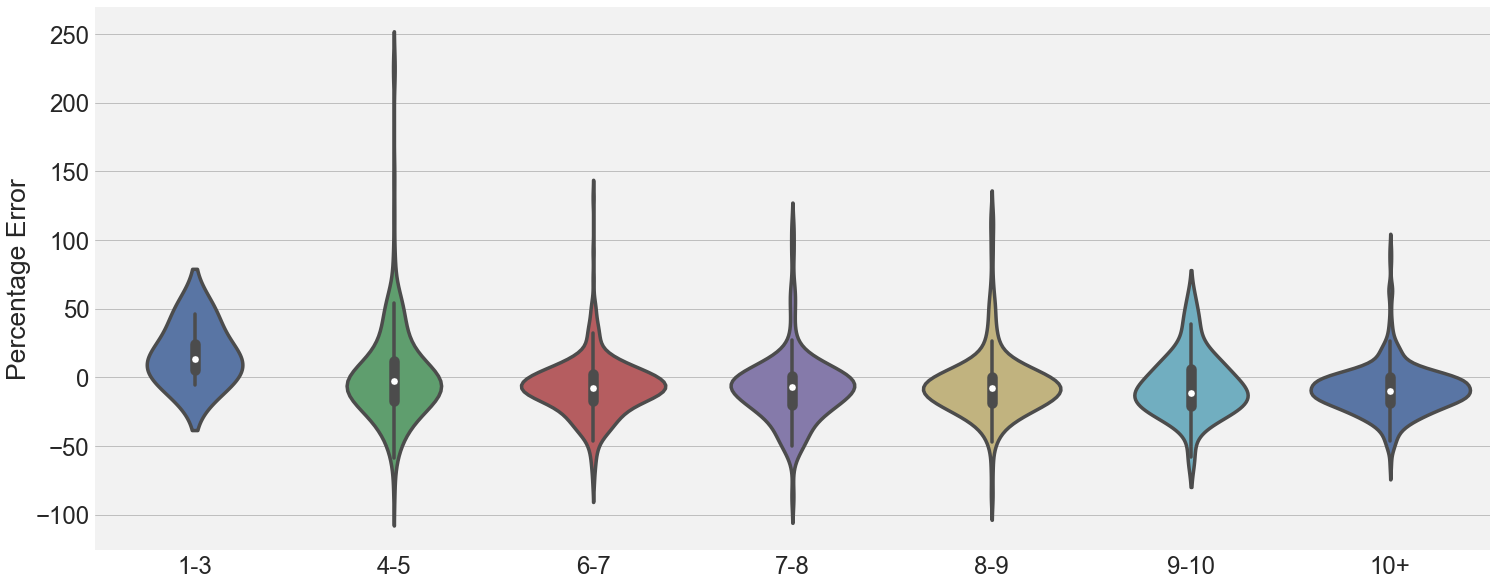

In [358]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Range_Open'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['1-3','4-5','6-7','7-8','8-9','9-10','10+'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of Opening Year Unemployment_Project.png',bbox_inches='tight')

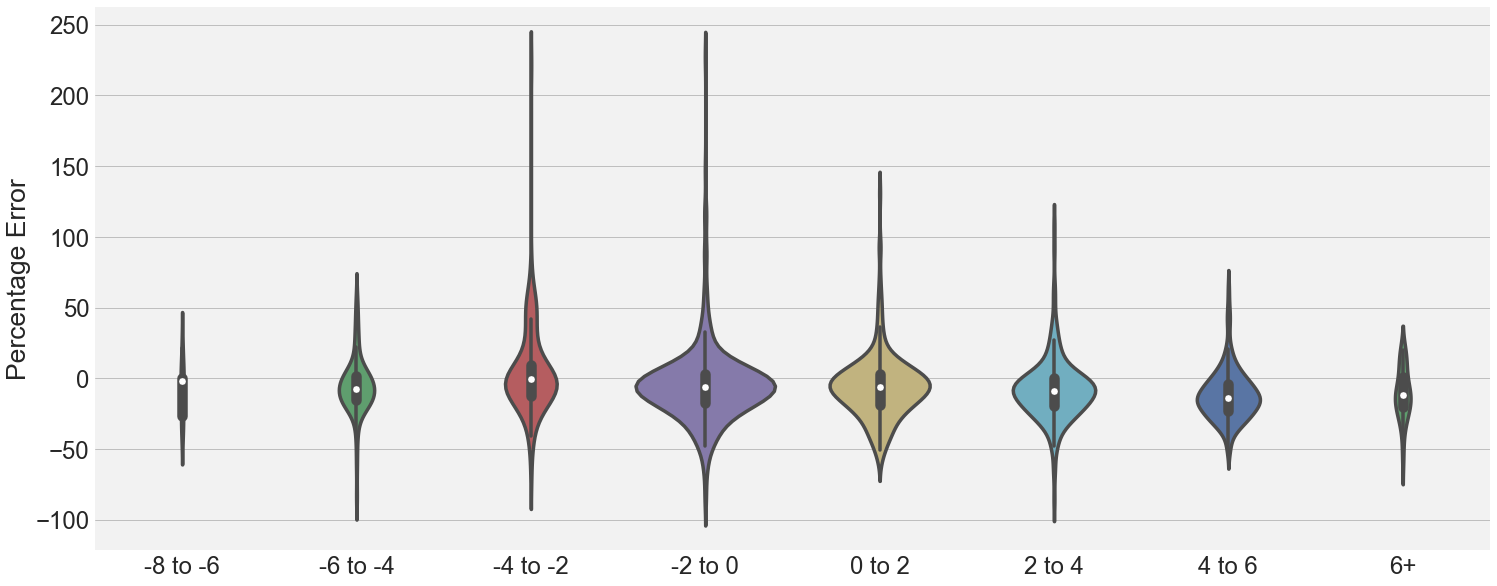

In [28]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Range_Change'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['-8 to -6','-6 to -4','-4 to -2','-2 to 0','0 to 2','2 to 4','4 to 6','6+'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of Unemployment Change_Project.png',bbox_inches='tight')

In [18]:
#df2.groupby(['Range_Open']).PercentError.describe(percentiles=[0.05,0.71])
#.to_csv('range1.csv')
df2.groupby(['Range_Open']).PercentError.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
Range_Open,,,,,,,,
3,4.0,16.731333,21.700768,-5.409998,-3.209696,13.082451,41.780798,46.170429
7,600.0,-3.731898,28.215623,-83.421429,-40.098514,-5.926962,42.649705,227.602474
9,296.0,-6.600737,24.903299,-86.645461,-40.959932,-7.467629,33.980711,118.362283
10,35.0,-5.145517,22.327751,-57.777778,-28.135758,-11.224490,39.051909,56.190691
11,356.0,-8.680334,18.080196,-62.995595,-34.425305,-9.641459,19.595809,93.379791


In [371]:
df2[df2['Change']<-5]

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change
159,237592-2,27000.00000,33700.00000,-6700.0000,6700.0000,-19.881306,19.881306,FL,6.266667,9.20,4.150000,5,1,4,2,2015,2010,2017.0,4,5,3,5,-5.050000
160,237632-1,14100.00000,19500.00000,-5400.0000,5400.0000,-27.692308,27.692308,FL,7.200000,10.40,3.200000,3,3,6,3,2004,2001,2006.0,12,5,3,5,-7.200000
193,240373-1,8200.00000,8440.00000,-240.0000,240.0000,-2.843602,2.843602,FL,7.200000,10.40,4.000000,3,1,1,1,2005,2002,2007.0,4,5,3,5,-6.400000
950,8918,40000.00000,47000.00000,-7000.0000,7000.0000,-14.893617,14.893617,FL,6.300000,10.40,4.800000,5,1,4,3,2014,2009,2016.0,1,1,8,5,-5.600000
962,8928,36500.00000,43500.00000,-7000.0000,7000.0000,-16.091954,16.091954,FL,4.800000,11.00,5.400000,3,3,5,3,2013,2010,2015.0,12,1,8,7,-5.600000
963,8929,37500.00000,38800.00000,-1300.0000,1300.0000,-3.350515,3.350515,FL,4.200000,10.00,4.150000,5,3,5,3,2015,2010,2017.0,12,1,8,5,-5.850000
965,8931,50000.00000,55000.00000,-5000.0000,5000.0000,-9.090909,9.090909,FL,6.300000,11.00,5.400000,3,3,5,3,2013,2010,2015.0,12,1,8,7,-5.600000
966,8932,54500.00000,56300.00000,-1800.0000,1800.0000,-3.197158,3.197158,FL,5.500000,11.00,5.400000,3,3,5,3,2013,2010,2015.0,12,1,8,7,-5.600000
967,8933,36500.00000,43000.00000,-6500.0000,6500.0000,-15.116279,15.116279,FL,5.500000,11.00,5.400000,3,3,5,3,2013,2010,2015.0,12,1,8,7,-5.600000
970,8936,47500.00000,53500.00000,-6000.0000,6000.0000,-11.214953,11.214953,FL,5.500000,11.00,5.400000,3,3,5,3,2013,2010,2015.0,12,1,8,7,-5.600000


In [25]:
bins=[-8,-6,-4,-2,0,2,4,6,8]
df2.groupby(pd.cut(df2['Change'], bins)).PercentError.describe(percentiles=[0.05,0.7])
#.to_csv('range5.csv')
#df2.groupby(pd.cut(df2['Change'], bins)).AbsPE.describe(percentiles=[0.05,0.95])
#.to_csv('range4.csv')

,count,mean,std,min,5%,50%,70%,max
Change,,,,,,,,
"(-8, -6]",8.0,-8.685810,19.288183,-35.374150,-32.685505,-2.017039,-1.153530,21.428571
"(-6, -4]",93.0,-5.628288,20.300275,-83.421429,-31.300453,-7.179115,0.063327,57.945500
"(-4, -2]",136.0,4.446945,31.387419,-68.823529,-30.606498,-0.669207,6.154274,221.866527
"(-2, 0]",367.0,-4.657362,28.294742,-86.645461,-40.838152,-6.363428,0.681486,227.602474
"(0, 2]",263.0,-6.000663,23.272517,-57.198844,-40.578597,-6.319703,0.215351,130.769231
"(2, 4]",217.0,-8.013314,22.120656,-85.862069,-36.086572,-8.627673,-1.616562,108.128398
"(4, 6]",166.0,-11.752378,17.797568,-50.994764,-35.257208,-13.941746,-4.835742,63.755459
"(6, 8]",41.0,-10.511725,17.963143,-57.777778,-36.000000,-11.522634,-2.515723,20.106762


Text(0,0.5,'Percentage Error')

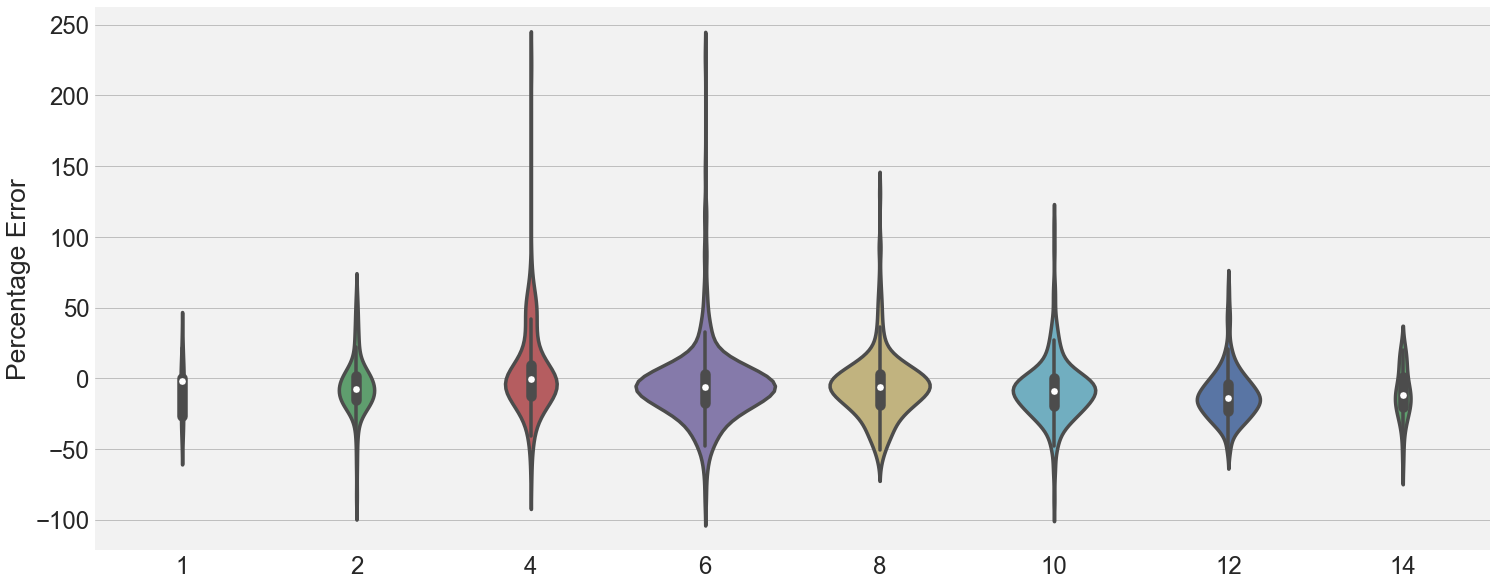

In [27]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Range_Change'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
#ax.figure.get_axes()[0].set_xticklabels(['1-3','4-5','6-7','7-8','8-9','9-10','10+'])
ax.set_ylabel('Percentage Error')
#ax.figure.savefig('violin plot of Opening Year Unemployment_Project.png',bbox_inches='tight')

In [33]:
df2['Forecast_Method'].value_counts()

6    676
1    252
4    179
5    177
2      7
Name: Forecast_Method, dtype: int64

In [34]:
df2=df2[df2['AverageForecast'].notnull()]
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,...,3,2005,2004,2006.0,11,6,1,7,-0.900000,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,3,2017,2012,2010.0,1,6,1,11,1.300000,8
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,...,3,2009,2006,2008.0,12,6,1,7,0.600000,8
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,3,2010,2009,2010.0,1,6,5,11,-0.100000,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,3,2010,2005,2008.0,3,6,1,7,0.600000,8
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,3,2008,2008,2010.0,1,6,6,11,3.700000,10
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,3,2007,2005,2010.0,3,6,4,11,4.300000,12
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,3,2013,2007,2009.0,2,6,3,11,4.800000,12
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,...,3,2009,2003,2010.0,11,6,1,11,3.900000,10
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,3,2009,2009,2008.0,1,6,5,7,0.000000,6


In [37]:
df2['Forecast_Method']=df2['Forecast_Method'].astype('float')

In [40]:
df2.groupby('Forecast_Method').PercentError.describe(percentiles=[0.05,0.95]).to_csv('method2.csv')
df2.groupby('Forecast_Method').AbsPE.describe()

,count,mean,std,min,25%,50%,75%,max
Forecast_Method,,,,,,,,
1.0,252.0,22.207679,21.926966,0.436681,7.411680,15.294647,31.413866,147.368421
2.0,7.0,11.320085,6.316744,0.346620,8.983516,14.021739,14.954577,16.996047
4.0,179.0,16.880842,16.066945,0.000000,5.614959,12.547529,22.345991,90.740741
5.0,177.0,18.550057,15.601933,0.639378,7.903357,14.860681,24.092409,86.645461
6.0,676.0,15.490965,18.672136,0.000000,4.253856,11.037185,21.377635,227.602474


In [45]:
df2.groupby(['FunctionalClass','Forecast_Method']).PercentError.describe(percentiles=[0.05,0.95]).to_csv('method5.csv')
df2.groupby(['FunctionalClass','Forecast_Method']).AbsPE.describe().to_csv('method6.csv')

In [62]:
pd.options.display.max_columns=50
k=df2[df2['FunctionalClass']==3]
k

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.500000,10.300000,6,1,6.0,3,2013,2007,2009.0,2,6,3,11,4.800000,12
11,1663,3600.000000,5010.000000,-1410.000000,1410.000000,-28.143713,28.143713,WI,8.600000,4.900000,8.600000,3,3,1.0,2,2010,2007,2010.0,12,1,3,9,3.700000,10
13,1693,11820.000000,10880.000000,940.000000,940.000000,8.639706,8.639706,WI,4.900000,4.900000,4.900000,0,3,1.0,1,2007,2007,2007.0,12,1,3,7,0.000000,6
17,1760,6460.000000,8310.000000,-1850.000000,1850.000000,-22.262335,22.262335,WI,7.800000,4.900000,7.800000,4,3,1.0,1,2011,2007,2011.0,12,1,3,9,2.900000,10
18,18221,7760.000000,9880.000000,-2120.000000,2120.000000,-21.457490,21.457490,OH,10.300000,10.300000,10.300000,1,1,6.0,3,2010,2009,2009.0,1,6,3,11,0.000000,6
24,18604,4620.000000,7151.670000,-2531.670000,2531.670000,-35.399704,35.399704,OH,10.300000,5.900000,10.300000,2,1,6.0,3,2007,2005,2009.0,1,6,3,11,4.400000,12
26,18629,4030.000000,5124.047143,-1094.047143,1094.047143,-21.351231,21.351231,OH,10.228571,5.400000,10.228571,2,1,6.0,3,2008,2006,2010.0,1,6,3,11,4.828571,12
27,18630,9140.000000,12087.500000,-2947.500000,2947.500000,-24.384695,24.384695,OH,6.500000,5.900000,6.500000,2,1,6.0,3,2007,2005,2008.0,1,6,3,7,0.600000,8
34,19468,12990.000000,15657.500000,-2667.500000,2667.500000,-17.036564,17.036564,OH,10.300000,5.800000,10.200000,3,3,6.0,3,2005,2002,2010.0,12,6,3,11,4.400000,12
36,19567,4390.000000,6120.000000,-1730.000000,1730.000000,-28.267974,28.267974,OH,10.300000,5.500000,10.300000,2,1,6.0,3,2009,2007,2009.0,1,6,3,11,4.800000,12


In [102]:
flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['PercentError']!='#DIV/0!']
flatdata_adjusted['PercentError']=flatdata_adjusted['PercentError'].astype('float')
]

C:\Users\jho337\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [103]:
flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['TollType']!='Unknown Toll Type']

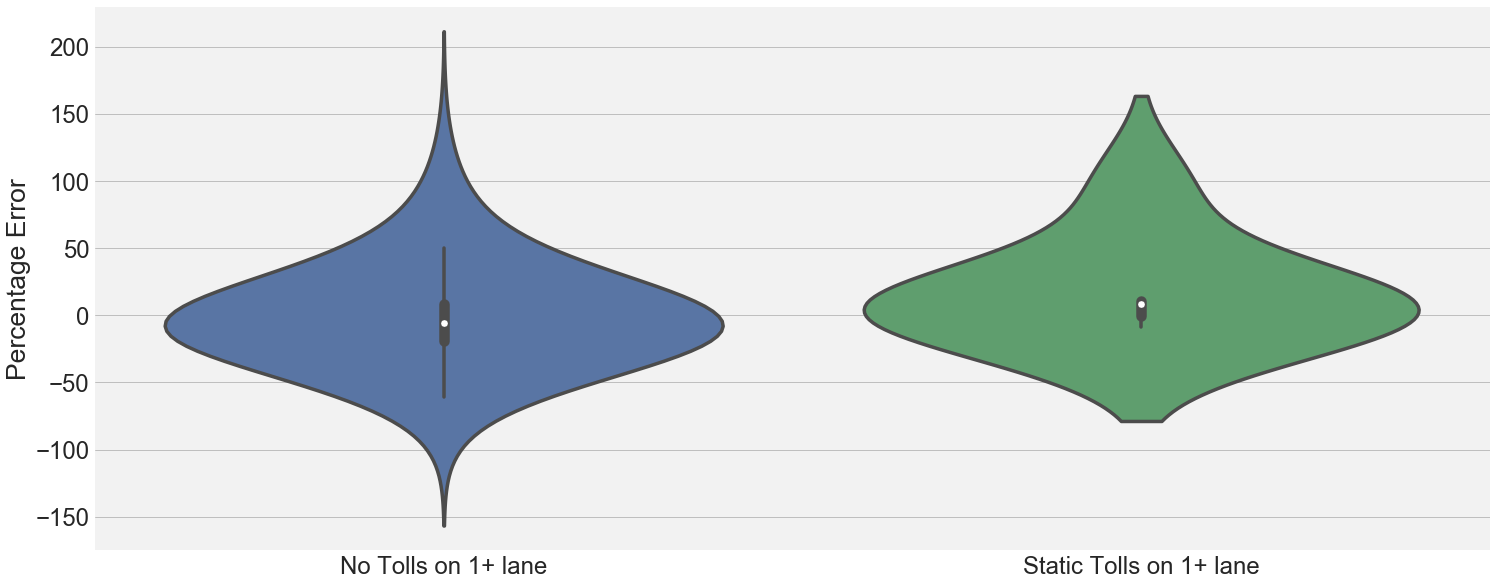

In [109]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
#flatdata_adjusted['TollType']=flatdata_adjusted['TollType'].astype('float')

ax=sns.violinplot(x=flatdata_adjusted['TollType'],y=flatdata_adjusted['PercentError'],
                  palette='deep',
#                  x_order=[1,4,5,6],
#                  scale='count'
                  bw=1
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
#ax.figure.get_axes()[0].set_xticklabels(['1-3','4-5','6-7','7-8','8-9','9-10','10+'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of Toll Type_Project.png',bbox_inches='tight')

Text(0,0.5,'Percentage Error')

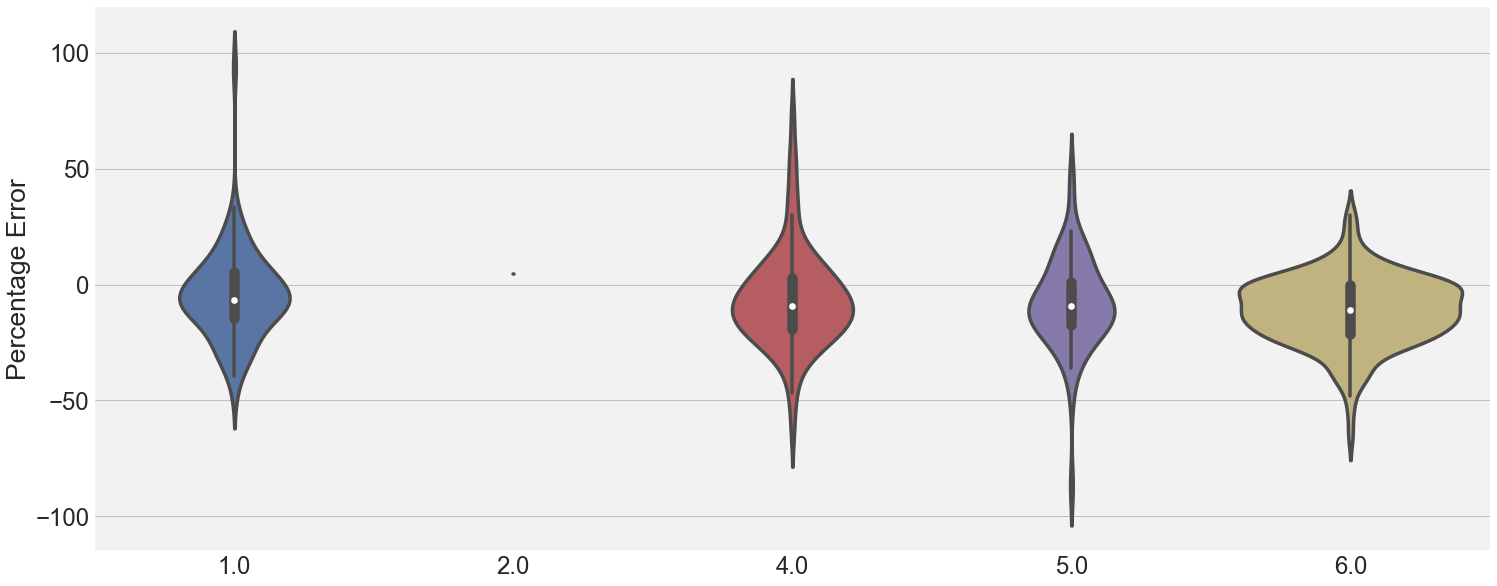

In [61]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=k['Forecast_Method'],y=df2['PercentError'],
                  palette='deep',
                  x_order=[1,4,5,6],
                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
#ax.figure.get_axes()[0].set_xticklabels(['1-3','4-5','6-7','7-8','8-9','9-10','10+'])
ax.set_ylabel('Percentage Error')
#ax.figure.savefig('violin plot of Opening Year Unemployment_Project.png',bbox_inches='tight')

In [69]:
def agency(x):
    if x.State=='FL':
        agency=1
    elif x.State=='MA':
        agency=2
    elif x.State=='MI':
        agency=3
    elif x.State=='MN':
        agency=4
    elif x.State=='OH':
        agency=5
    elif x.State=='WI':
        agency=6
    else:
        agency=7
    return agency

In [70]:
df2=df2.assign(Agency=df2.apply(agency,axis=1))
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,5.400000,1,2,6.0,3,2005,2004,2006.0,11,5,1,7,-0.900000,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,10.200000,5,1,6.0,3,2017,2012,2010.0,1,5,1,11,1.300000,8
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,6.500000,3,3,6.0,3,2009,2006,2008.0,12,5,1,7,0.600000,8
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,10.200000,1,1,6.0,3,2010,2009,2010.0,1,5,5,11,-0.100000,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,6.500000,5,1,6.0,3,2010,2005,2008.0,3,5,1,7,0.600000,8
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,10.200000,0,1,6.0,3,2008,2008,2010.0,1,5,6,11,3.700000,10
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,10.200000,2,1,6.0,3,2007,2005,2010.0,3,5,4,11,4.300000,12
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,10.300000,6,1,6.0,3,2013,2007,2009.0,2,5,3,11,4.800000,12
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,10.200000,6,2,6.0,3,2009,2003,2010.0,11,5,1,11,3.900000,10
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,6.500000,0,1,6.0,3,2009,2009,2008.0,1,5,5,7,0.000000,6


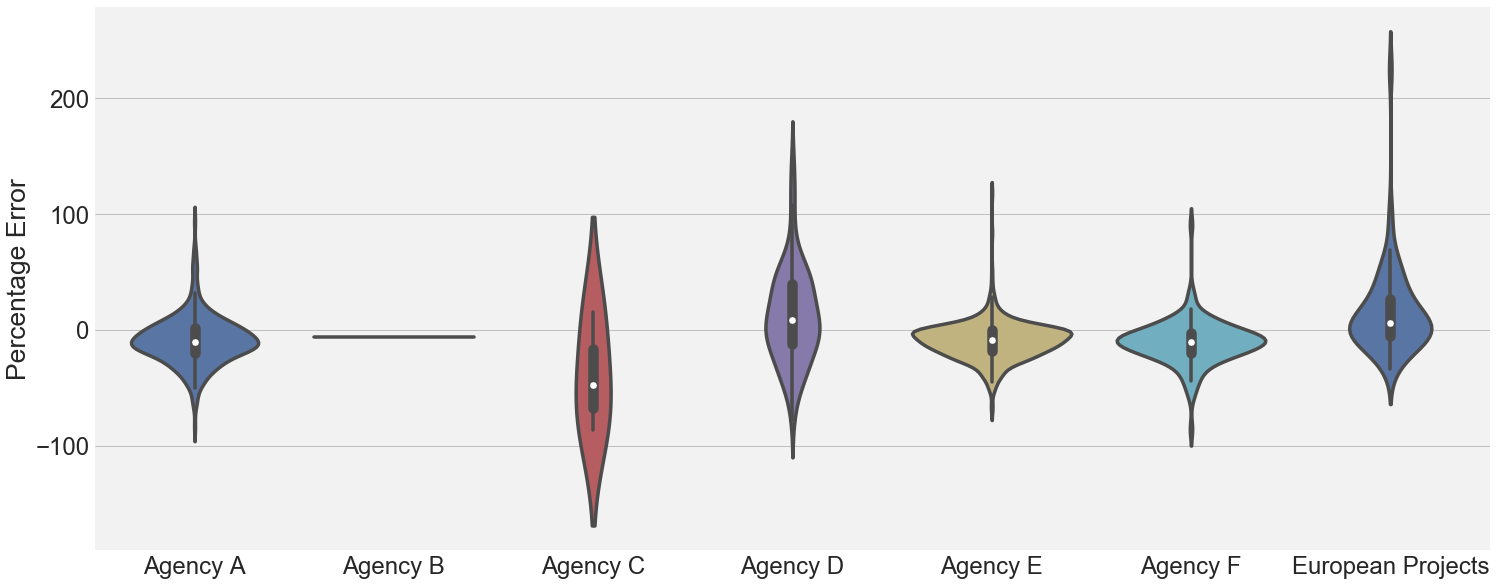

In [73]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Agency'],y=df2['PercentError'],
                  palette='deep',
                  x_order=['FL','MA','MI','MN','OH','WI','European'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['Agency A','Agency B','Agency C','Agency D','Agency E','Agency F','European Projects'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot by agency_Project.png',bbox_inches='tight')

In [80]:
df2.groupby('Agency').PercentError.describe(percentiles=[0.35,0.75])
#df2.groupby('Agency').AbsPE.describe()

,count,mean,std,min,35%,50%,75%,max
Agency,,,,,,,,
1,381.0,-9.072700,21.043772,-83.421429,-15.384615,-10.294118,1.226994,93.379791
2,1.0,-6.227206,NaN,-6.227206,-6.227206,-6.227206,-6.227206,-6.227206
3,3.0,-39.753104,51.345451,-86.645461,-59.402141,-47.726433,-16.306925,15.112583
4,99.0,11.674295,40.915369,-77.566425,-6.188938,8.786611,39.774156,147.368421
5,562.0,-9.451096,16.253341,-68.823529,-14.256430,-8.479858,0.000000,118.362283
6,132.0,-10.783920,18.834316,-85.862069,-15.363248,-10.352485,-2.786808,90.740741
7,113.0,15.620353,38.882277,-33.936784,-1.762646,5.755469,26.538230,227.602474


In [113]:
flatdata_adjusted['AbsPE']=flatdata_adjusted['AbsPE'].astype('float')
#flatdata_adjusted.groupby('TollType').PercentError.describe(percentiles=[0.05,0.95]).to_csv('toll.csv')
flatdata_adjusted.groupby('TollType').AbsPE.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
TollType,,,,,,,,
No Tolls on 1+ lane,3799.0,22.603842,22.546112,0.000000,0.483061,15.677966,68.000000,147.619048
Static Tolls on 1+ lane,7.0,20.405573,32.270315,4.294479,4.832222,8.777969,68.854226,93.379791


In [115]:
bins=[0,3000,6000,9000,13000,17000,22000,30000,40000,60000,200000]
df2.groupby(pd.cut(df2['AverageForecast'], bins)).PercentError.describe(percentiles=[0.05,0.95]).to_csv('forecast1.csv')
df2.groupby(pd.cut(df2['AverageForecast'], bins)).AbsPE.describe(percentiles=[0.05,0.95]).to_csv('forecast2.csv')

Text(0,0.5,'Percentage Error')

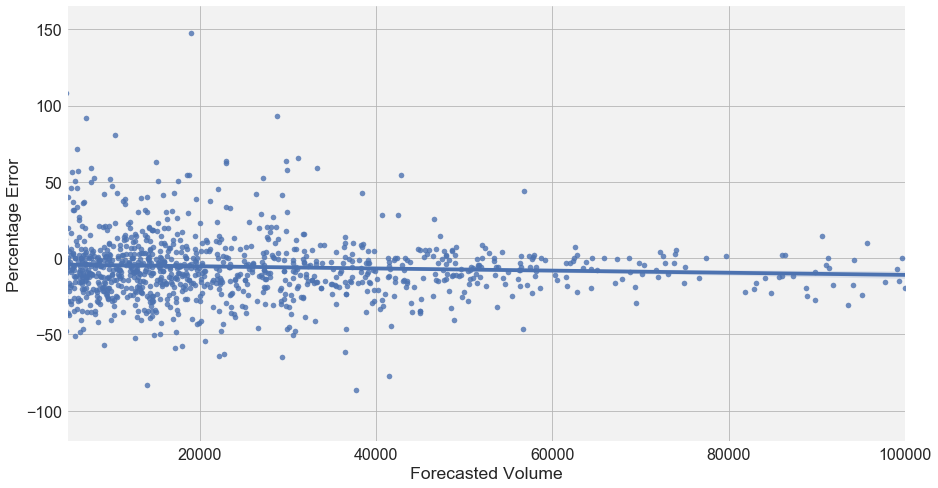

In [116]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(df2['AverageForecast'],df2['PercentError'])
ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,100000)

ax.set_ylim(-120,165)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error Segment.png',bbox_inches='tight')

In [117]:
df2

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Range_Open,Change,Range_Change
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,5.400000,1,2,6.0,3,2005,2004,2006.0,11,5,1,7,-0.900000,6
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,10.200000,5,1,6.0,3,2017,2012,2010.0,1,5,1,11,1.300000,8
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,6.500000,3,3,6.0,3,2009,2006,2008.0,12,5,1,7,0.600000,8
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,10.200000,1,1,6.0,3,2010,2009,2010.0,1,5,5,11,-0.100000,6
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,6.500000,5,1,6.0,3,2010,2005,2008.0,3,5,1,7,0.600000,8
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,10.200000,0,1,6.0,3,2008,2008,2010.0,1,5,6,11,3.700000,10
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,10.200000,2,1,6.0,3,2007,2005,2010.0,3,5,4,11,4.300000,12
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,10.300000,6,1,6.0,3,2013,2007,2009.0,2,5,3,11,4.800000,12
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,10.200000,6,2,6.0,3,2009,2003,2010.0,11,5,1,11,3.900000,10
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,6.500000,0,1,6.0,3,2009,2009,2008.0,1,5,5,7,0.000000,6


In [122]:
bins=[2001,2002,2003,2007,2008,2009,2010,2011,2012,2013]
flatdata_adjusted['UnemploymentRate_OpeningYear'].groupby(pd.cut(flatdata_adjusted['Year_ofObservation'], bins)).describe()

,count,mean,std,min,25%,50%,75%,max
Year_ofObservation,,,,,,,,
"(2001, 2002]",36.0,4.483333,2.546707e-01,3.1,4.5,4.5,4.5,4.9
"(2002, 2003]",50.0,4.912000,5.212387e-01,3.1,4.9,4.9,4.9,6.3
"(2003, 2007]",384.0,4.770312,7.899856e-01,3.1,4.1,4.9,5.5,6.3
"(2007, 2008]",449.0,6.188641,5.765741e-01,3.1,6.3,6.5,6.5,6.5
"(2008, 2009]",614.0,9.907655,7.213523e-01,8.6,10.3,10.3,10.3,10.4
"(2009, 2010]",684.0,9.775146,9.490671e-01,3.1,10.2,10.2,10.2,11.0
"(2010, 2011]",170.0,8.501765,7.931268e-01,7.8,7.8,7.8,8.9,9.9
"(2011, 2012]",79.0,8.235443,4.731341e-01,7.4,8.5,8.5,8.5,8.5
"(2012, 2013]",77.0,7.400000,1.162203e-14,7.4,7.4,7.4,7.4,7.4


In [125]:
flatdata_adjusted.groupby('main_ProjectInformation.State').TrafficForecast.describe()

,count,mean,std,min,25%,50%,75%,max
main_ProjectInformation.State,,,,,,,,
DK,225.0,16143.777778,23007.843476,700.0,4400.00,8300.0,15700.0,116400.0
FL,425.0,29962.400000,27840.069484,1500.0,14500.00,25100.0,38800.0,231000.0
MA,12.0,91400.000000,28437.299450,47300.0,75225.00,93300.0,115250.0,124700.0
MI,6.0,93216.666667,73448.040591,7550.0,36562.50,92275.0,151850.0,177500.0
MN,1320.0,25214.671212,18290.496334,720.0,10915.00,21000.0,36525.0,179400.0
NO,23.0,15163.913043,19758.896613,100.0,3075.00,11000.0,17500.0,88900.0
OH,1580.0,29371.337975,33455.267843,250.0,6835.00,15590.0,38502.5,172870.0
SE,21.0,24692.333333,21369.619207,5634.0,12330.00,15500.0,25000.0,80000.0
UK,208.0,29449.682692,32736.566875,260.0,6899.25,17200.0,37750.0,164350.0
